<a href="https://colab.research.google.com/github/Karanam14/Projects.github.io/blob/main/Stress_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Stress Detection with Machine Learning

We live in an era where there is a surplus of information flowing in every second. Sometimes this leads to stress. ☹️ Too much stress can negatively impact our health and may lead to headaches, high blood pressure, heart problems, diabetes, skin conditions, asthma, arthritis, depression, and anxiety.

In [1]:
from IPython.display import Image

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from IPython import get_ipython
import warnings
warnings.filterwarnings("ignore")

In [3]:
from wordcloud import STOPWORDS
from PIL import Image
from wordcloud import WordCloud
from google.colab import files
uploaded = files.upload()

Saving dreaddit-test.csv to dreaddit-test.csv


In [4]:
import io
df1 = pd.read_csv(io.BytesIO(uploaded["dreaddit-test.csv"]))

In [5]:
from google.colab import files
uploaded = files.upload()

Saving dreaddit-train.csv to dreaddit-train.csv


In [6]:
df2 = pd.read_csv(io.BytesIO(uploaded["dreaddit-train.csv"]))

In [7]:
df1.shape

(715, 116)

In [8]:
df2.shape

(2838, 116)

In [9]:
df1.sample

<bound method NDFrame.sample of         id      subreddit post_id sentence_range  \
0      896  relationships  7nu7as       [50, 55]   
1    19059        anxiety  680i6d        (5, 10)   
2     7977           ptsd  8eeu1t        (5, 10)   
3     1214           ptsd  8d28vu         [2, 7]   
4     1965  relationships  7r1e85       [23, 28]   
..     ...            ...     ...            ...   
710  24271           ptsd  7vavh4         (0, 5)   
711   2212  relationships  7oeyuc       [70, 75]   
712  27951  relationships  7ssxec       (35, 40)   
713   1164     assistance  90bila        [8, 13]   
714   1519     assistance  7uueuc        [5, 10]   

                                                  text  label  confidence  \
0    Its like that, if you want or not.“ ME: I have...      0    0.800000   
1    I man the front desk and my title is HR Custom...      0    1.000000   
2    We'd be saving so much money with this new hou...      1    1.000000   
3    My ex used to shoot back with 

In [10]:
df2.sample

<bound method NDFrame.sample of              subreddit post_id sentence_range  \
0                 ptsd  8601tu       (15, 20)   
1           assistance  8lbrx9         (0, 5)   
2                 ptsd  9ch1zh       (15, 20)   
3        relationships  7rorpp        [5, 10]   
4     survivorsofabuse  9p2gbc         [0, 5]   
...                ...     ...            ...   
2833     relationships  7oee1t       [35, 40]   
2834              ptsd  9p4ung       [20, 25]   
2835           anxiety  9nam6l        (5, 10)   
2836    almosthomeless  5y53ya        [5, 10]   
2837              ptsd  5y25cl         [0, 5]   

                                                   text     id  label  \
0     He said he had not felt that way before, sugge...  33181      1   
1     Hey there r/assistance, Not sure if this is th...   2606      0   
2     My mom then hit me with the newspaper and it s...  38816      1   
3     until i met my new boyfriend, he is amazing, h...    239      1   
4     October 

In [11]:
df = df1.append(df2)

In [12]:
df.shape

(3553, 116)

In [13]:
df.sample

<bound method NDFrame.sample of          id       subreddit post_id sentence_range  \
0       896   relationships  7nu7as       [50, 55]   
1     19059         anxiety  680i6d        (5, 10)   
2      7977            ptsd  8eeu1t        (5, 10)   
3      1214            ptsd  8d28vu         [2, 7]   
4      1965   relationships  7r1e85       [23, 28]   
...     ...             ...     ...            ...   
2833   1713   relationships  7oee1t       [35, 40]   
2834   1133            ptsd  9p4ung       [20, 25]   
2835  10442         anxiety  9nam6l        (5, 10)   
2836   1834  almosthomeless  5y53ya        [5, 10]   
2837    961            ptsd  5y25cl         [0, 5]   

                                                   text  label  confidence  \
0     Its like that, if you want or not.“ ME: I have...      0    0.800000   
1     I man the front desk and my title is HR Custom...      0    1.000000   
2     We'd be saving so much money with this new hou...      1    1.000000   
3     M

In [14]:
df.head()

,id,subreddit,post_id,sentence_range,text,label,confidence,social_timestamp,social_karma,syntax_ari,...,lex_dal_min_pleasantness,lex_dal_min_activation,lex_dal_min_imagery,lex_dal_avg_activation,lex_dal_avg_imagery,lex_dal_avg_pleasantness,social_upvote_ratio,social_num_comments,syntax_fk_grade,sentiment
0,896,relationships,7nu7as,"[50, 55]","Its like that, if you want or not.“ ME: I have...",0,0.8,1.514981e+09,22,-1.238793,...,1.0000,1.2000,1.0,1.65864,1.32245,1.80264,0.63,62,-0.148707,0.000000
1,19059,anxiety,680i6d,"(5, 10)",I man the front desk and my title is HR Custom...,0,1.0,1.493348e+09,5,7.684583,...,1.4000,1.1250,1.0,1.69133,1.69180,1.97249,1.00,2,7.398222,-0.065909
2,7977,ptsd,8eeu1t,"(5, 10)",We'd be saving so much money with this new hou...,1,1.0,1.524517e+09,10,2.360408,...,1.1429,1.0000,1.0,1.70974,1.52985,1.86108,1.00,8,3.149288,-0.036818
3,1214,ptsd,8d28vu,"[2, 7]","My ex used to shoot back with ""Do you want me ...",1,0.5,1.524018e+09,5,5.997000,...,1.0000,1.3000,1.0,1.72615,1.52000,1.84909,1.00,7,6.606000,-0.066667
4,1965,relationships,7r1e85,"[23, 28]",I haven’t said anything to him yet because I’m...,0,0.8,1.516200e+09,138,4.649418,...,1.1250,1.1429,1.0,1.75642,1.43582,1.91725,0.84,70,4.801869,0.141667


In [15]:
df.columns

Index(['id', 'subreddit', 'post_id', 'sentence_range', 'text', 'label',
       'confidence', 'social_timestamp', 'social_karma', 'syntax_ari',
       ...
       'lex_dal_min_pleasantness', 'lex_dal_min_activation',
       'lex_dal_min_imagery', 'lex_dal_avg_activation', 'lex_dal_avg_imagery',
       'lex_dal_avg_pleasantness', 'social_upvote_ratio',
       'social_num_comments', 'syntax_fk_grade', 'sentiment'],
      dtype='object', length=116)

In [16]:
df.info

<bound method DataFrame.info of          id       subreddit post_id sentence_range  \
0       896   relationships  7nu7as       [50, 55]   
1     19059         anxiety  680i6d        (5, 10)   
2      7977            ptsd  8eeu1t        (5, 10)   
3      1214            ptsd  8d28vu         [2, 7]   
4      1965   relationships  7r1e85       [23, 28]   
...     ...             ...     ...            ...   
2833   1713   relationships  7oee1t       [35, 40]   
2834   1133            ptsd  9p4ung       [20, 25]   
2835  10442         anxiety  9nam6l        (5, 10)   
2836   1834  almosthomeless  5y53ya        [5, 10]   
2837    961            ptsd  5y25cl         [0, 5]   

                                                   text  label  confidence  \
0     Its like that, if you want or not.“ ME: I have...      0    0.800000   
1     I man the front desk and my title is HR Custom...      0    1.000000   
2     We'd be saving so much money with this new hou...      1    1.000000   
3     M

In [17]:
df.isnull().sum()

id                          0
subreddit                   0
post_id                     0
sentence_range              0
text                        0
                           ..
lex_dal_avg_pleasantness    0
social_upvote_ratio         0
social_num_comments         0
syntax_fk_grade             0
sentiment                   0
Length: 116, dtype: int64

In [18]:
from textblob import TextBlob

In [19]:
TextBlob("the best").polarity

1.0

In [20]:
TextBlob("the best").sentiment

Sentiment(polarity=1.0, subjectivity=0.3)

In [21]:
def detect_sentiment(text):
   return TextBlob(text).sentiment.polarity

In [22]:
df3 = df[["text"]]

In [23]:
df3.head()

,text
0,"Its like that, if you want or not.“ ME: I have..."
1,I man the front desk and my title is HR Custom...
2,We'd be saving so much money with this new hou...
3,"My ex used to shoot back with ""Do you want me ..."
4,I haven’t said anything to him yet because I’m...


In [24]:
df3["sentiment"] = df3["text"].apply(detect_sentiment)

In [25]:
df3.head()

,text,sentiment
0,"Its like that, if you want or not.“ ME: I have...",0.000000
1,I man the front desk and my title is HR Custom...,-0.065909
2,We'd be saving so much money with this new hou...,-0.036818
3,"My ex used to shoot back with ""Do you want me ...",-0.066667
4,I haven’t said anything to him yet because I’m...,0.141667


In [26]:
df3.sentiment.value_counts()

0.000000    84
0.250000    24
0.100000    23
0.150000    17
0.125000    16
            ..
0.090625     1
0.319481     1
0.151082     1
0.090741     1
0.016667     1
Name: sentiment, Length: 2627, dtype: int64

In [27]:
import nltk
import re
stemmer = nltk.SnowballStemmer("english")
from nltk.corpus import stopwords
import string

In [ ]:
import nltk
nltk.download('all')
stopwords = set(stopwords.words("english"))

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   U

In [30]:
import nltk

In [31]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [33]:
def clean(text):
  text = str(text).lower()
  text = re.sub('\[.*?\]', '', text)
  text = re.sub('https?://\S+|www\.\S+', '', text)
  text = re.sub('<.*?>+', '', text)
  text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
  text = re.sub('\n', '', text)
  text = re.sub('\w*\d\w*', '', text)
  text = [word for word in text.split(' ') if word not in stopwords]
  text=" ".join(text)
  text = [stemmer.stem(word) for word in text.split(' ')]
  text=" ".join(text)
  return text
df3["text"] = df3["text"].apply(clean)

In [34]:
df3["text"]

0       like want not“ problem take longer ask friend ...
1       man front desk titl hr custom servic repres  j...
2       wed save much money new housrit expens citi go...
3       ex use shoot back want go time matter almost w...
4       haven't said anyth yet i'm sure someon would t...
                              ...                        
2833     week ago precious ignor  jan  happi year prec...
2834    dont abil cope anymor im tri lot thing trigger...
2835    case first time your read post look peopl will...
2836    find normal good relationship main problem see...
2837    talk mom morn said sister trauma wors mine did...
Name: text, Length: 3553, dtype: object

In [35]:
df3["label"] = df["label"].map({0:"No stress", 1:"Stress"})
df3 = df3[["text","label"]]


In [36]:
df3.head()

,text,label
0,like want not“ problem take longer ask friend ...,No stress
1,man front desk titl hr custom servic repres j...,No stress
2,wed save much money new housrit expens citi go...,Stress
3,ex use shoot back want go time matter almost w...,Stress
4,haven't said anyth yet i'm sure someon would t...,No stress


In [37]:
df3["sentiment"] = df3["text"].apply(detect_sentiment)

In [50]:
df3.head()

,text,label,sentiment
0,like want not“ problem take longer ask friend ...,No stress,0.000000
1,man front desk titl hr custom servic repres j...,No stress,-0.190909
2,wed save much money new housrit expens citi go...,Stress,-0.014141
3,ex use shoot back want go time matter almost w...,Stress,-0.025000
4,haven't said anyth yet i'm sure someon would t...,No stress,0.420000


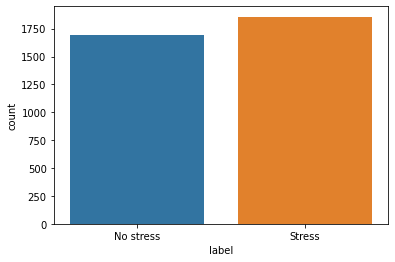

In [38]:
import seaborn as sns
sns.countplot(x = df3.label)

In [39]:
x = df3.text
y = df3.label

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [41]:
vect = CountVectorizer(stop_words = "english")

In [42]:
x=vect.fit_transform(df3.text)

In [43]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42)

In [44]:
mb = MultinomialNB()

In [45]:
tahmin = mb.fit(x_train, y_train).predict(x_test)

In [46]:
accuracy_score(tahmin,y_test)

0.7165354330708661

In [50]:
from sklearn.tree import DecisionTreeClassifier
d = DecisionTreeClassifier()

In [51]:
d.fit(x_train, y_train)

DecisionTreeClassifier()

In [52]:
tahmin1=d.predict(x_test)

In [53]:
accuracy_score(y_test,tahmin1)

0.608548931383577

Now let's test the performance of our model on some random sanity-based sentences:

In [54]:
user="Sometime I feel like I need some help"

In [55]:
df2=vect.transform([user]).toarray()
output=d.predict(df2)
print(output)

['Stress']
